In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()


from PySpice.Doc.ExampleTools import find_libraries
from PySpice.Spice.Netlist import Circuit
from PySpice.Spice.Library import SpiceLibrary
from PySpice.Unit import *
from PySpice.Probe.Plot import plot
from PySpice.Logging.Logging import setup_logging

setup_logging()

libraries_path = find_libraries()
spice_library = SpiceLibrary(libraries_path)
spice_library = SpiceLibrary(find_libraries())

In [2]:
circuit = Circuit('Solar module')
circuit.model('D1_top', 'D', IS = 8.8e-23, N =1)
circuit.model('D2_top', 'D', IS = 2.62e-13, N =2)

<class 'PySpice.Spice.Netlist.DeviceModel'> D2_top

In [3]:
circuit.V('1', '2', circuit.gnd, 0@u_V)
circuit.R('s', '2', '1', 2@u_Ohm)
circuit.R('sh', '1', circuit.gnd, 5.55@u_kOhm)
circuit.D('1', '1', circuit.gnd, model='D1_top')
circuit.D('2', '1', circuit.gnd, model='D2_top')
circuit.I('pv', circuit.gnd, '1', 18.7@u_mA)

CurrentSource Ipv

In [4]:
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.dc(V1=slice(0, 1.3, 0.0001))

2023-08-21 14:38:13,129 - PySpice.Spice.NgSpice.Shared.NgSpiceShared - Shared.WARNING - Unsupported Ngspice version 38


In [5]:
voltage = analysis.nodes['2'].as_ndarray() 
current = analysis.branches['v1'].as_ndarray()

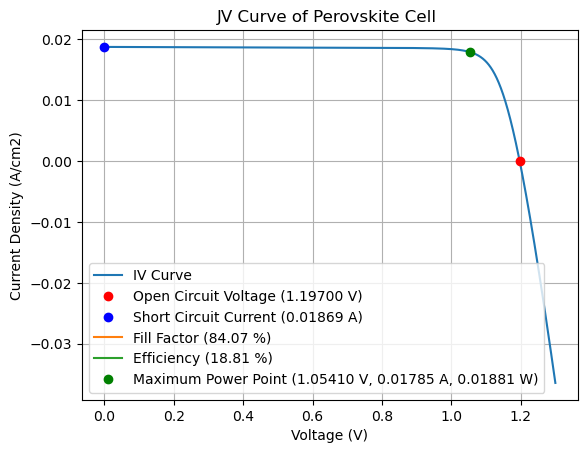

In [6]:
v_oc_index = np.argmin(np.abs(current)) 
v_oc = voltage[v_oc_index]

i_sc_index = np.argmin(np.abs(voltage))
i_sc = current[i_sc_index]


power = voltage * current
mpp_index = np.argmax(power)
v_mpp = voltage[mpp_index]
i_mpp = current[mpp_index]
max_power = power[mpp_index]
efficiency = (max_power/(0.1))*100
fill_factor = (v_mpp * i_mpp) / (v_oc * i_sc)

plt.figure()
plt.plot(voltage, current, label='IV Curve')
plt.xlabel('Voltage (V)')
plt.ylabel('Current Density (A/cm2)')
plt.title('JV Curve of Perovskite Cell ')
plt.grid()


plt.plot(v_oc, 0, 'ro', label=f'Open Circuit Voltage ({v_oc:.5f} V)')
plt.plot(0, i_sc, 'bo', label=f'Short Circuit Current ({i_sc:.5f} A)')
plt.plot(0, -0.025, label=f'Fill Factor ({fill_factor*100:.2f} %)')
plt.plot(0, -0.02, label=f'Efficiency ({efficiency:.2f} %)')
plt.plot(v_mpp, i_mpp, 'go', label=f'Maximum Power Point ({v_mpp:.5f} V, {i_mpp:.5f} A, {max_power:.5f} W)')
plt.legend()
plt.show()


In [7]:
for v, i in zip(voltage, current):
    print(f"{i:.5f}")

0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
0.01869
